# Final Tabular Project



## Define Project

Project Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Project Summary**:

This project addresses the growing challenge of early detection and prevention of diabetes using machine learning techniques. Diabetes is a chronic health condition affecting millions worldwide, and early prediction is essential for effective management. The goal is to develop a predictive model that can identify individuals at risk based on physiological and medical attributes, allowing for timely intervention and care.

**Dataset Overview**:

The dataset used is the Pima Indians Diabetes Database, publicly available on Kaggle. It contains 768 observations of adult female patients of Pima Indian heritage, each with 8 numerical medical predictors (e.g., glucose level, BMI, insulin) and one target variable: diabetes diagnosis (1 = positive, 0 = negative).

**Machine Learning Task**:

This is a Supervised Binary Classification problem. The model will learn to predict whether a patient has diabetes (1) or not (0) based on their health attributes.

## Data Loading and Initial Look


In [1]:
import os
import json

# Replace with your actual Kaggle API credentials
kaggle_token = {
    "username":"saminasbetel","key":"9abeffbf876fa8f5ba12b4e10c45cf35"
}

# Create Kaggle directory and save the token
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_token, f)

# Set proper file permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [2]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 21.9MB/s]


In [3]:
!unzip pima-indians-diabetes-database.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("diabetes.csv")  # adjust filename if needed
df.head()


Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


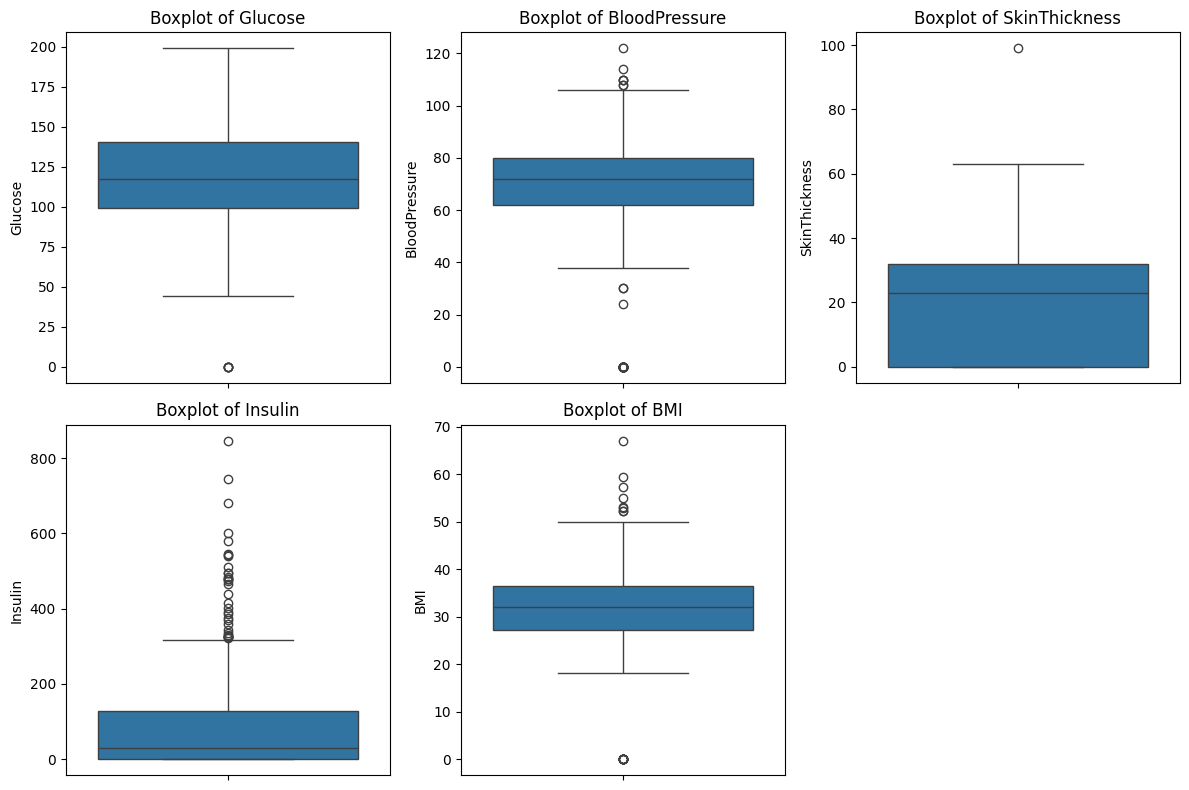

In [8]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [9]:
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_counts[col] = len(outliers)
    return pd.Series(outlier_counts).sort_values(ascending=False)

outliers_series = detect_outliers_iqr(df)
print(outliers_series)


BloodPressure               45
Insulin                     34
DiabetesPedigreeFunction    29
BMI                         19
Age                          9
Glucose                      5
Pregnancies                  4
SkinThickness                1
Outcome                      0
dtype: int64


In [10]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zero] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


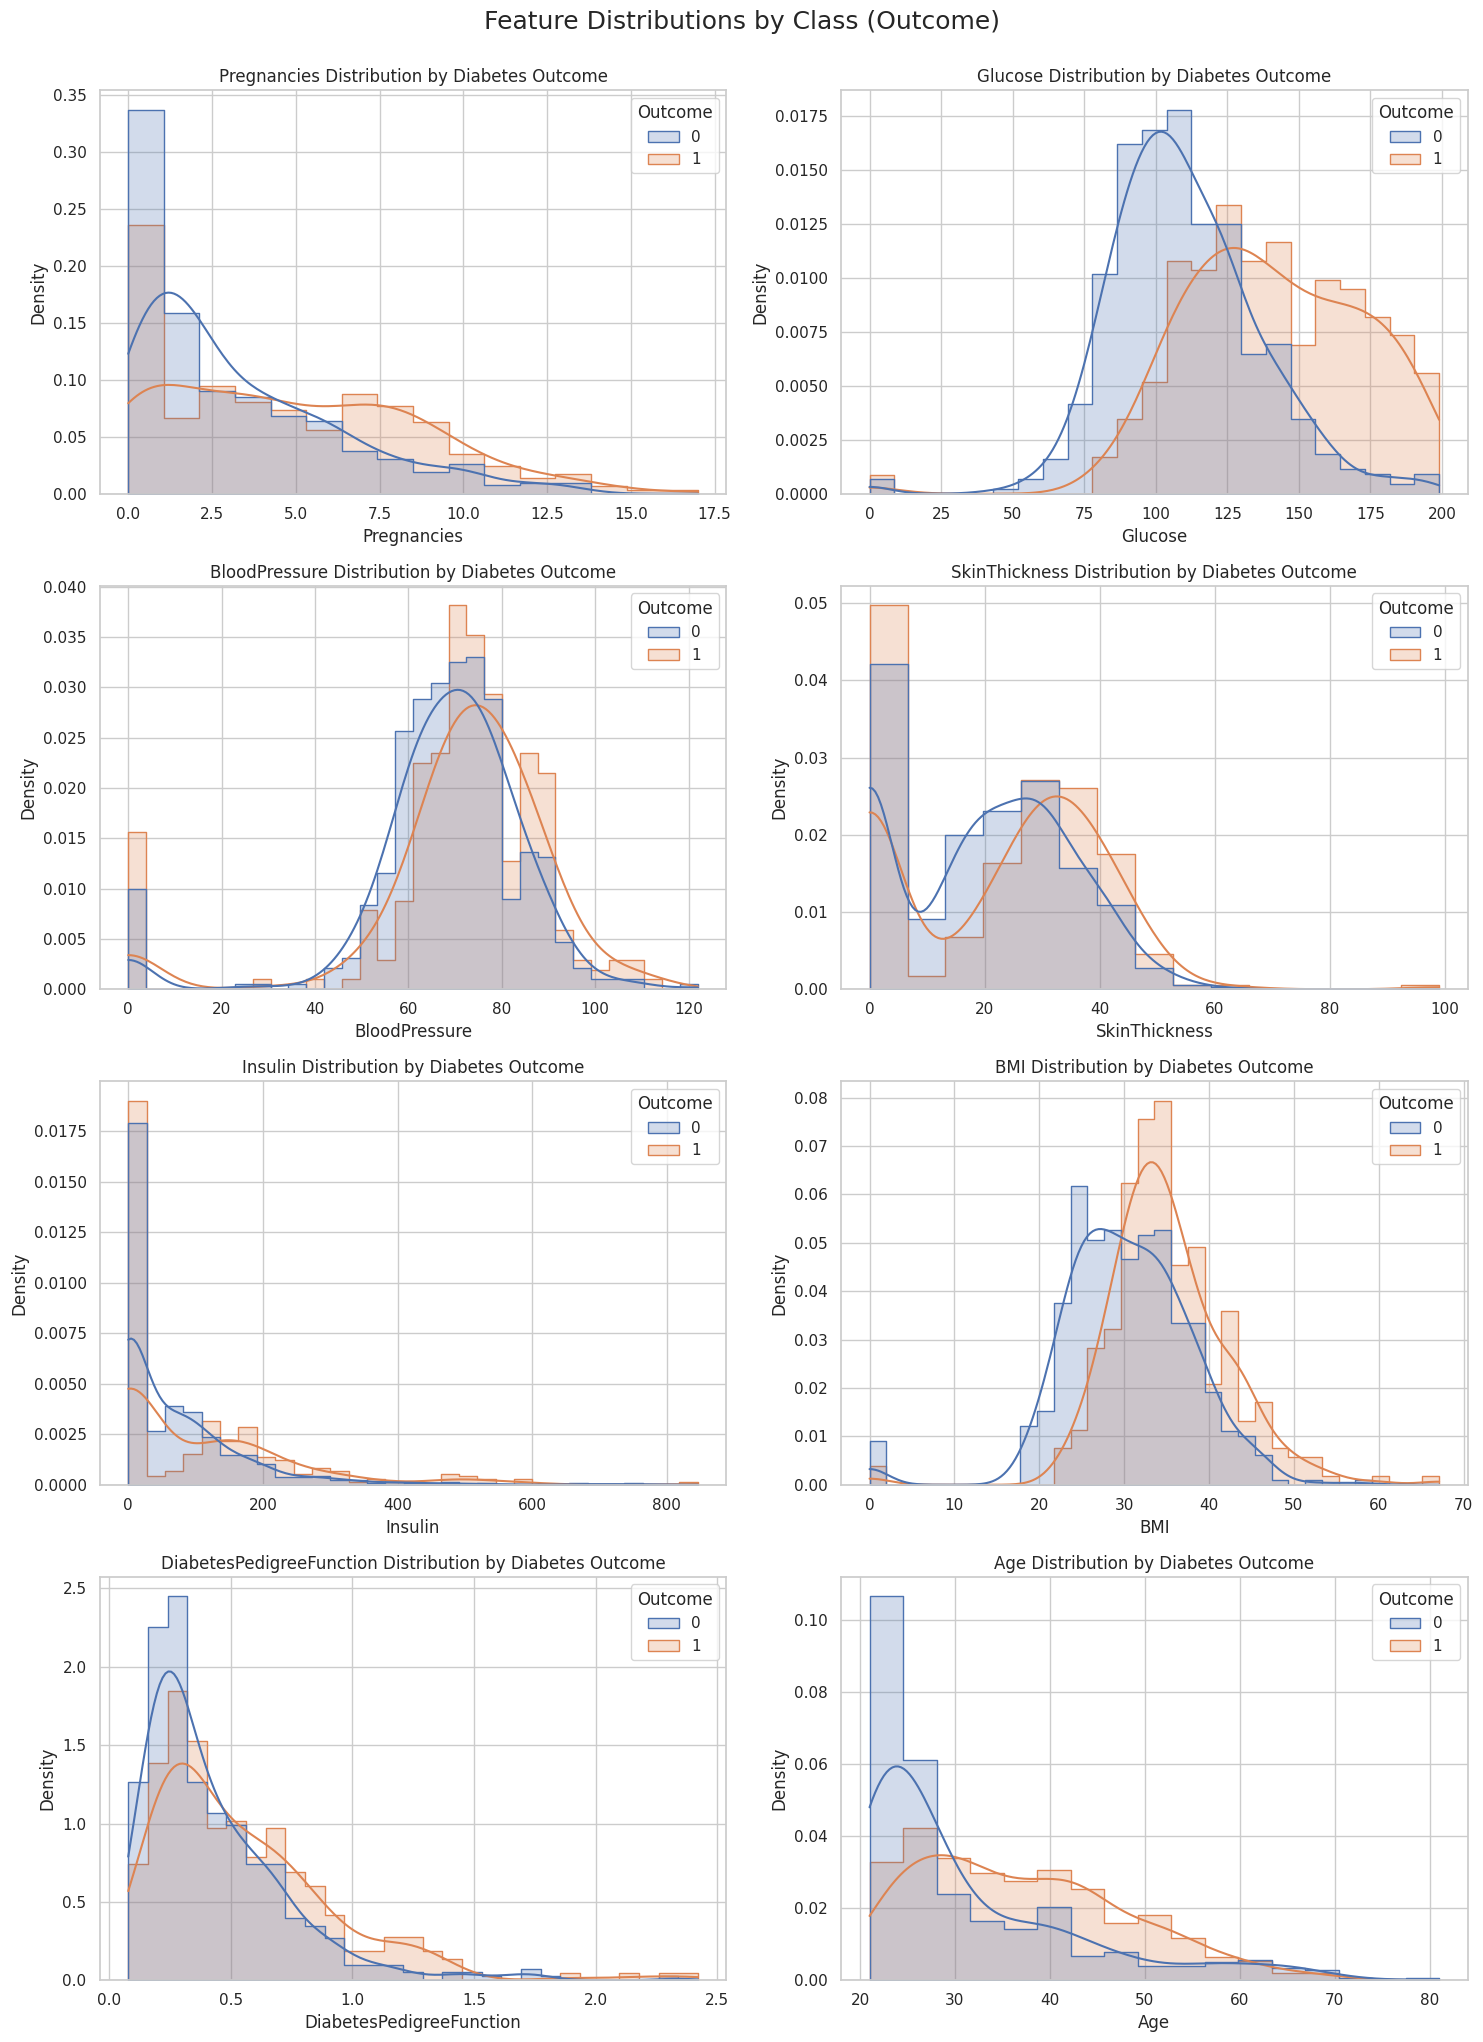

In [11]:
sns.set(style="whitegrid")

features = df.columns.drop('Outcome')

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'{feature} Distribution by Diabetes Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle("Feature Distributions by Class (Outcome)", fontsize=18, y=1.02)
plt.show()


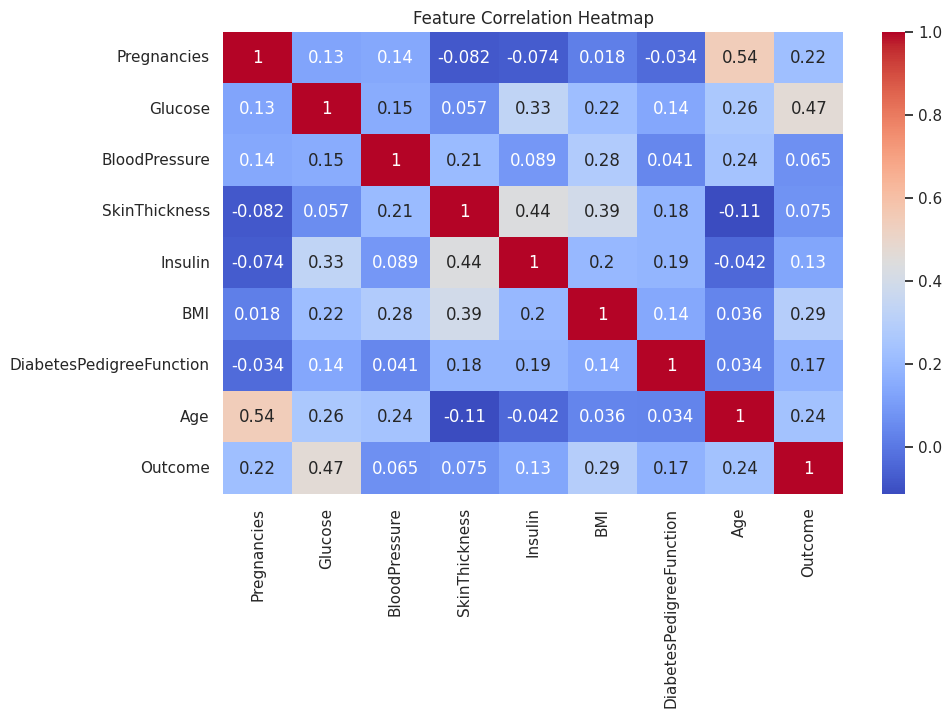

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


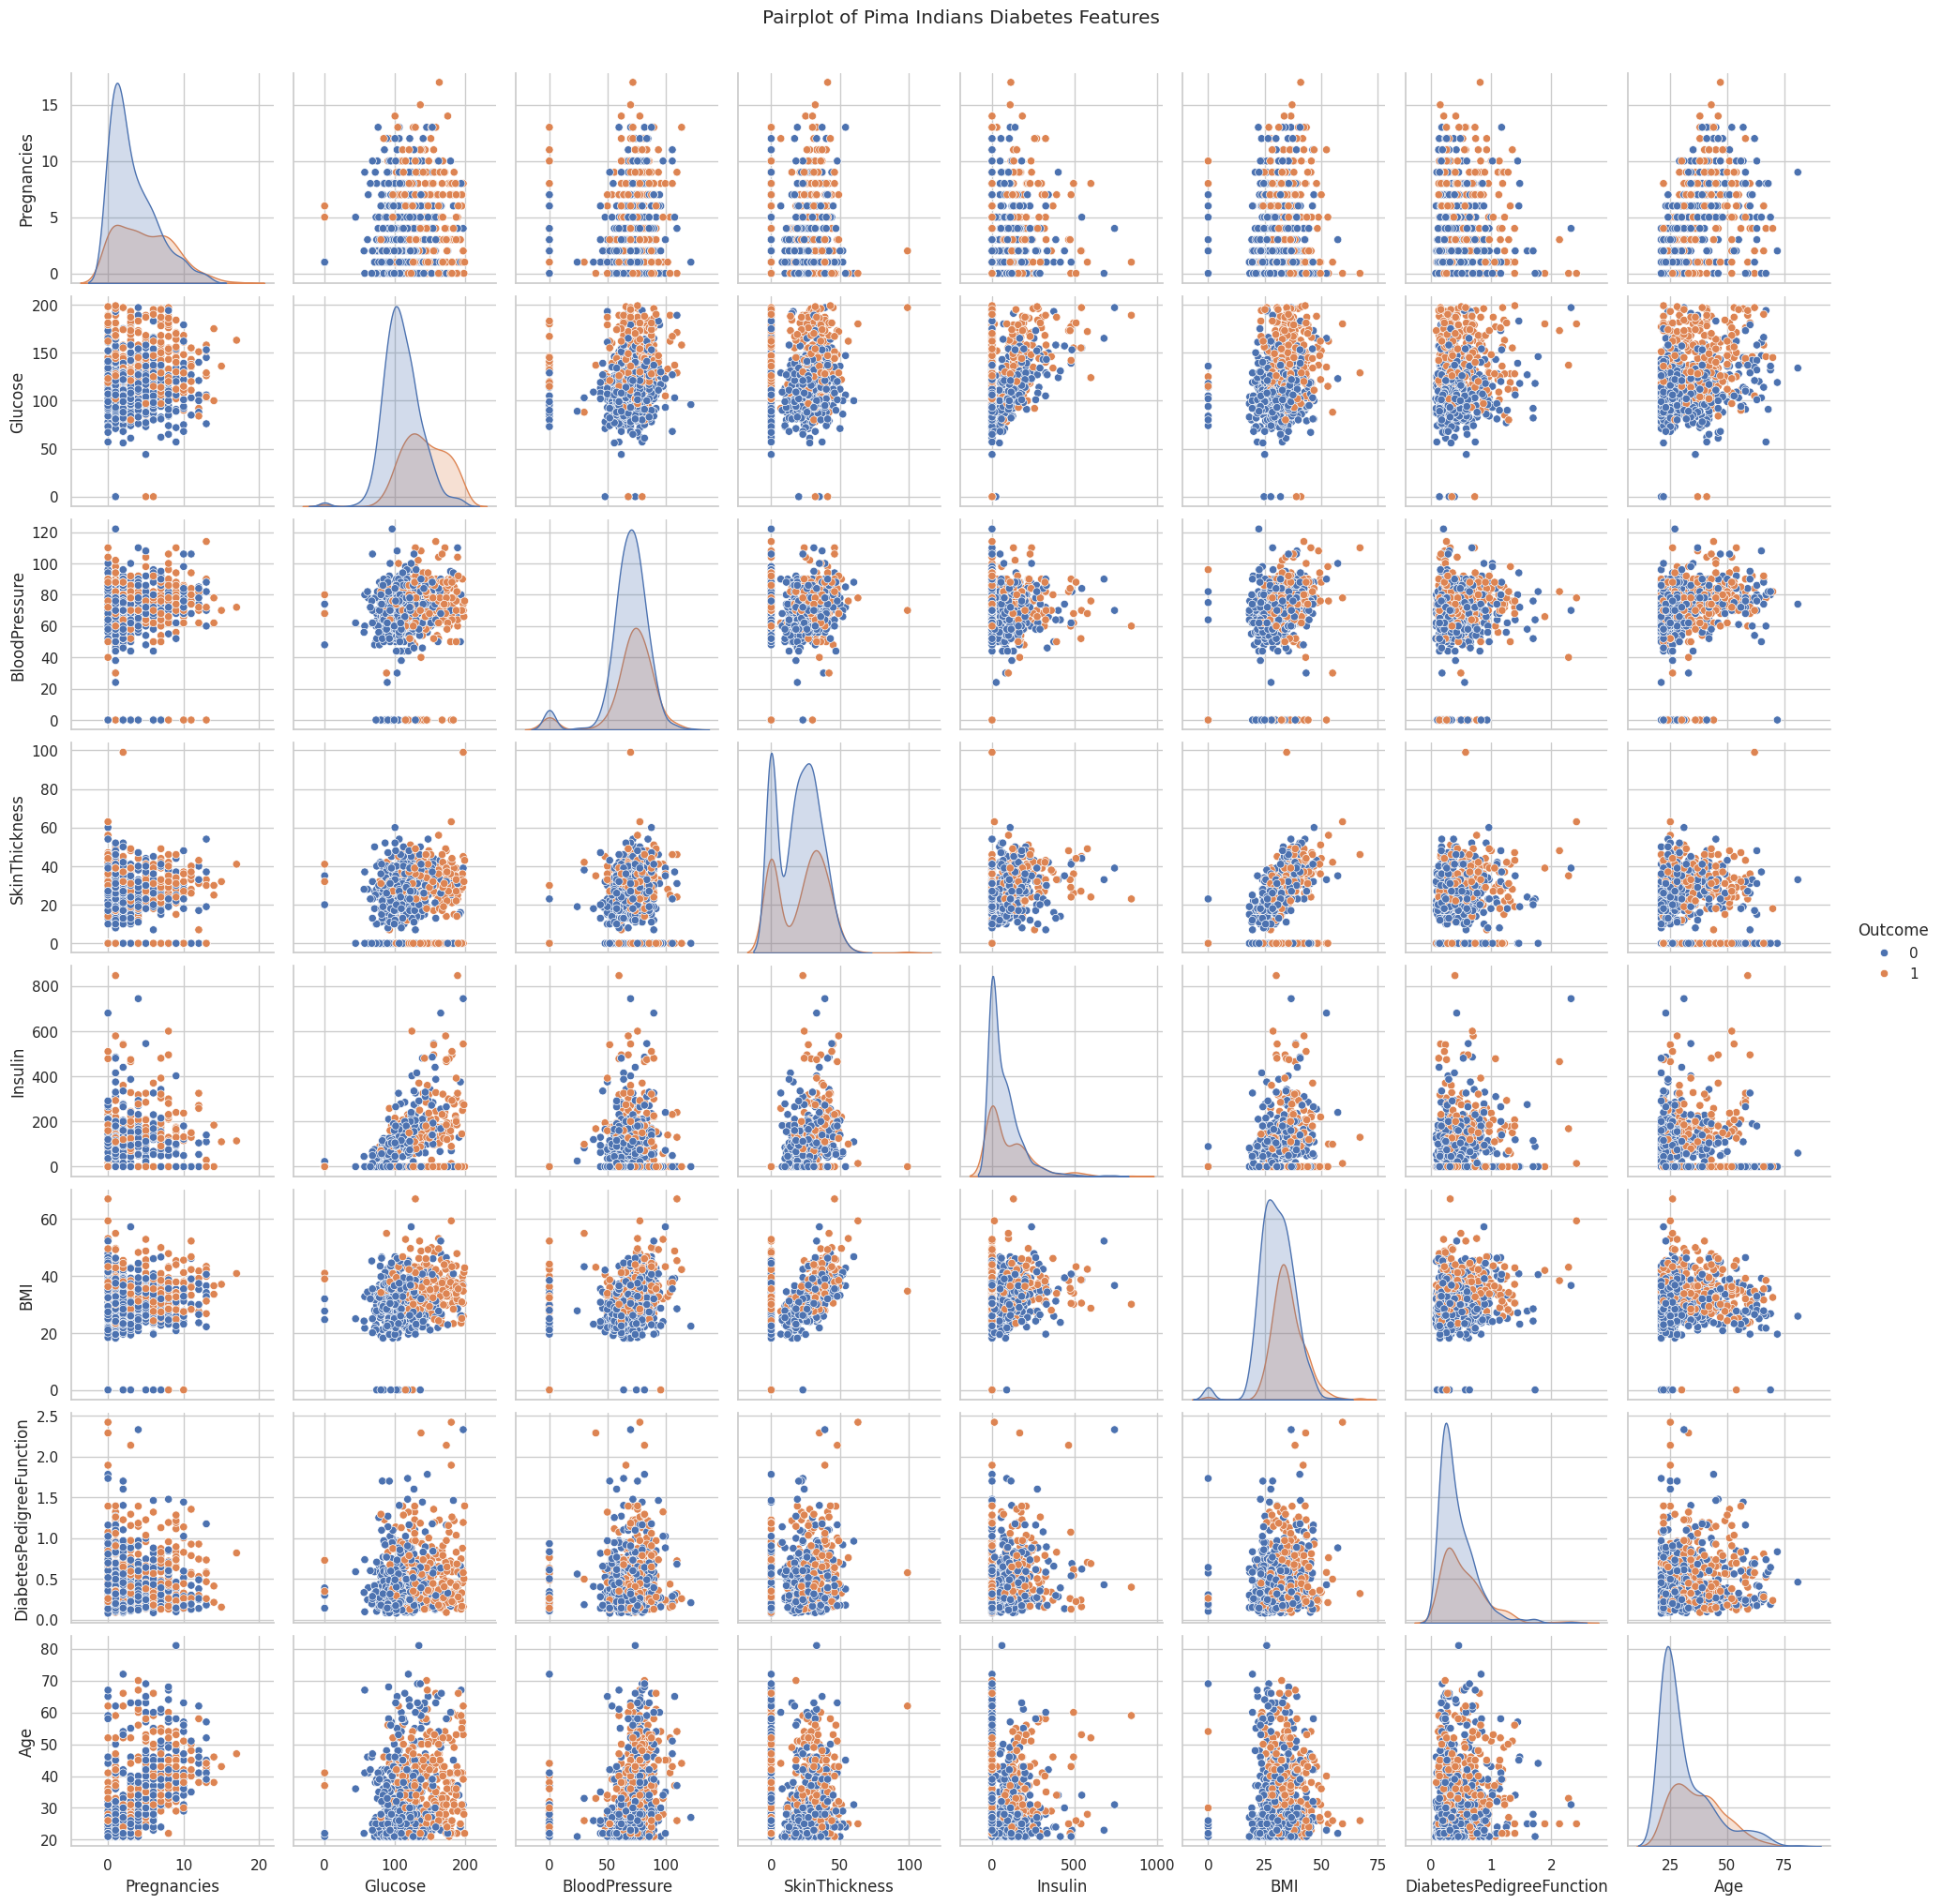

In [13]:
sns.pairplot(df, hue="Outcome",diag_kind="kde")
plt.suptitle("Pairplot of Pima Indians Diabetes Features", y=1.02)
plt.show()

## Data Cleaning and Preperation for Machine Learning



In [14]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())


In [15]:
df.describe().T[['min', 'max']]


,min,max
Pregnancies,0.000,17.00
Glucose,44.000,199.00
BloodPressure,24.000,122.00
SkinThickness,7.000,99.00
Insulin,14.000,846.00
BMI,18.200,67.10
DiabetesPedigreeFunction,0.078,2.42
Age,21.000,81.00
Outcome,0.000,1.00


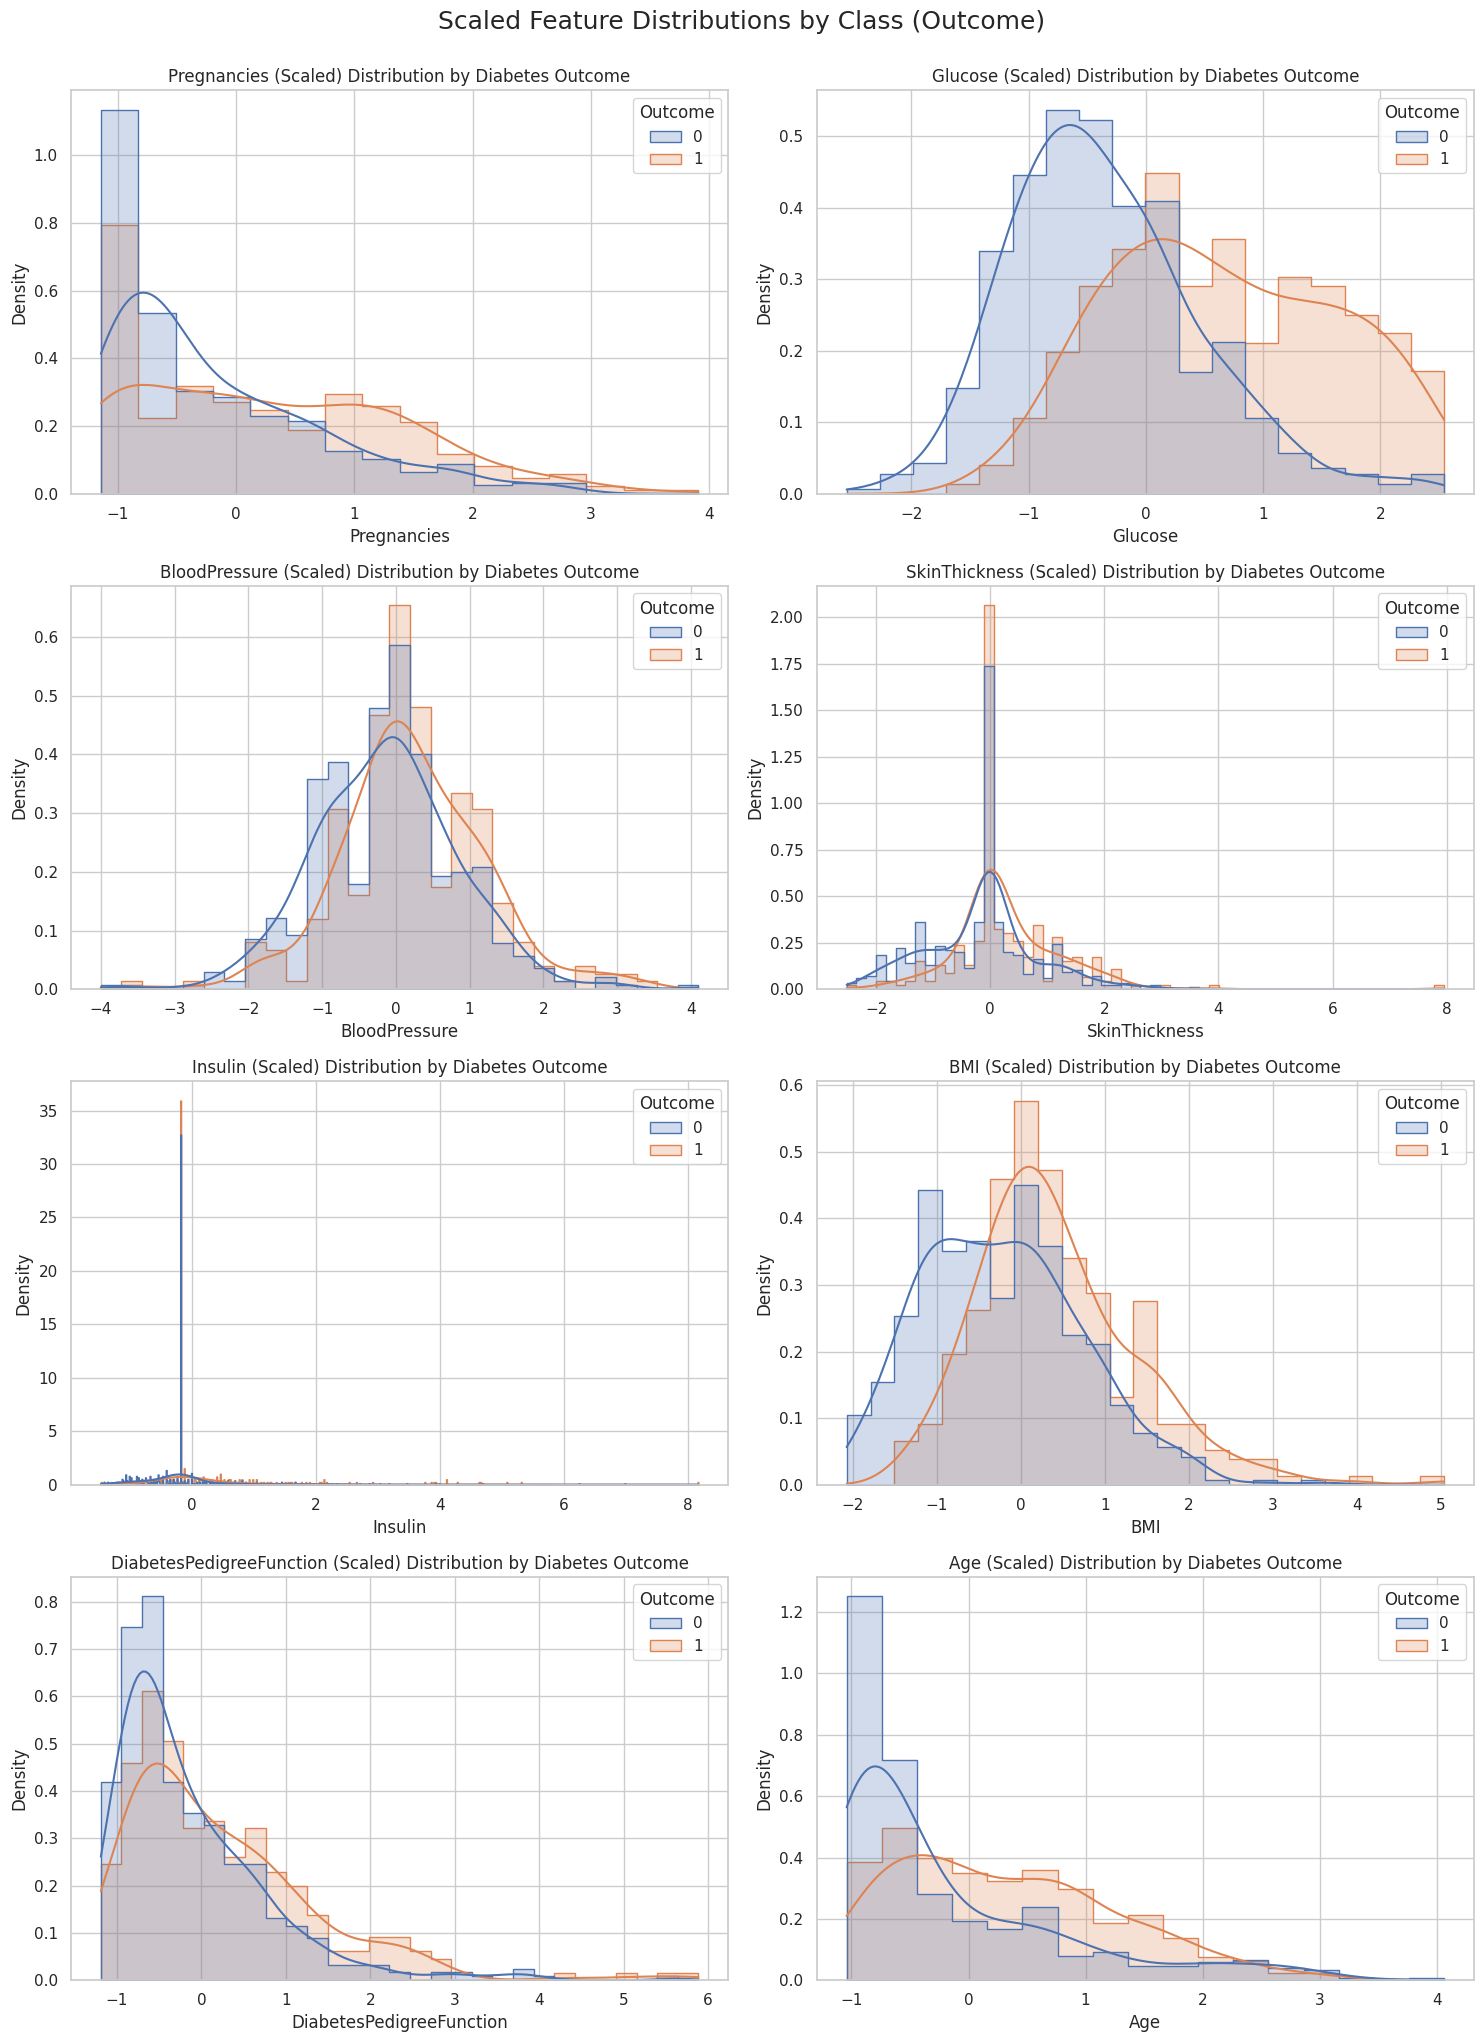

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

scaled_df = X_scaled_df.copy()
scaled_df['Outcome'] = y

sns.set(style="whitegrid")
features = X_scaled_df.columns

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=scaled_df, x=feature, hue='Outcome', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'{feature} (Scaled) Distribution by Diabetes Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle("Scaled Feature Distributions by Class (Outcome)", fontsize=18, y=1.02)
plt.show()



In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Define features and target
X = df.drop('Outcome', axis=1)  # All features except target
y = df['Outcome']               # Target variable

# Step 2: Split into train/val/test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Step 3: Train Random Forest on unscaled features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_val_pred_rf = rf_model.predict(X_val)

print("📊 Random Forest - Validation Set_Unscaled)")
rf_unscaled_acc= accuracy_score(y_val, y_val_pred_rf)
rf_unscaled_prec= precision_score(y_val, y_val_pred_rf)
rf_unscaled_rec= recall_score(y_val, y_val_pred_rf)
rf_unscaled_f1= f1_score(y_val, y_val_pred_rf)
print("Accuracy:", rf_unscaled_acc)
print("Precision:", rf_unscaled_prec)
print("Recall:", rf_unscaled_rec)
print("F1 Score:", rf_unscaled_f1)

📊 Random Forest - Validation Set_Unscaled)
Accuracy: 0.7922077922077922
Precision: 0.7619047619047619
Recall: 0.5925925925925926
F1 Score: 0.6666666666666666


In [33]:
from sklearn.linear_model import LogisticRegression

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_val_pred = model.predict(X_val_scaled)

# Metrics

print("Logistic Regression - Validation Set Metrics")
logreg_acc= accuracy_score(y_val, y_val_pred)
logreg_prec= precision_score(y_val, y_val_pred)
logreg_rec = recall_score(y_val, y_val_pred)
logreg_f1= f1_score(y_val, y_val_pred)
print("Accuracy:", logreg_acc)
print("Precision:", logreg_prec)
print("Recall:", logreg_rec)
print("F1 Score:", logreg_f1)


Logistic Regression - Validation Set Metrics
Accuracy: 0.7792207792207793
Precision: 0.7272727272727273
Recall: 0.5925925925925926
F1 Score: 0.6530612244897959


In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_val_pred_rf = rf_model.predict(X_val_scaled)

# Evaluate

print("Random Forest - Validation Set Metrics")
rf_scaled_acc= accuracy_score(y_val, y_val_pred_rf)
rf_scaled_prec= precision_score(y_val, y_val_pred_rf)
rf_scaled_rec= recall_score(y_val, y_val_pred_rf)
rf_scaled_f1= f1_score(y_val, y_val_pred_rf)
print("Accuracy:", rf_scaled_acc)
print("Precision:", rf_scaled_prec)
print("Recall:", rf_scaled_rec)
print("F1 Score:", rf_scaled_f1)

Random Forest - Validation Set Metrics
Accuracy: 0.7922077922077922
Precision: 0.7619047619047619
Recall: 0.5925925925925926
F1 Score: 0.6666666666666666


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a new Random Forest on resampled data
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the original validation set
y_val_pred_rf_resampled = rf_resampled.predict(X_val)

# Evaluate
print("📊 Random Forest - Validation Set After SMOTE")
rf_smote_acc= accuracy_score(y_val, y_val_pred_rf_resampled)
rf_smote_prec= precision_score(y_val, y_val_pred_rf_resampled)
rf_smote_rec= recall_score(y_val, y_val_pred_rf_resampled)
rf_smote_f1= f1_score(y_val, y_val_pred_rf_resampled)
print("Accuracy:", rf_smote_acc)
print("Precision:", rf_smote_prec)
print("Recall:", rf_smote_rec)
print("F1 Score:", rf_smote_f1)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rf_resampled))


📊 Random Forest - Validation Set After SMOTE
Accuracy: 0.7922077922077922
Precision: 0.6964285714285714
Recall: 0.7222222222222222
F1 Score: 0.7090909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.70      0.72      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



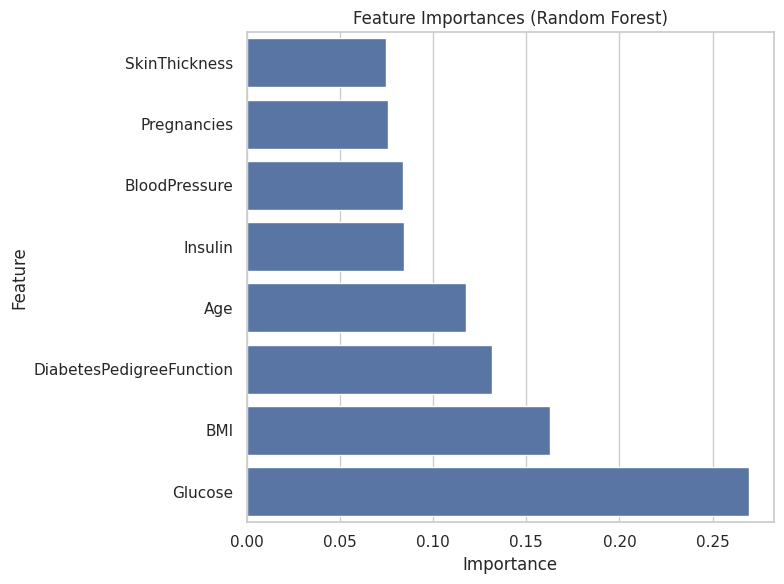

In [36]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_df = pd.Series(importances, index=feature_names).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=feat_df, y=feat_df.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [39]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200}


In [40]:
y_val_pred = best_model.predict(X_val)

print("🔍 Best Model - Validation Set Metrics")
grid_nosmote_acc= accuracy_score(y_val, y_val_pred)
grid_nosmote_prec= precision_score(y_val, y_val_pred)
grid_nosmote_rec = recall_score(y_val, y_val_pred)
grid_nosmote_f1= f1_score(y_val, y_val_pred)
print("Accuracy:", grid_nosmote_acc)
print("Precision:", grid_nosmote_prec)
print("Recall:", grid_nosmote_rec)
print("F1 Score:", grid_nosmote_f1)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


🔍 Best Model - Validation Set Metrics
Accuracy: 0.7662337662337663
Precision: 0.6956521739130435
Recall: 0.5925925925925926
F1 Score: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [41]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Use the best estimator from GridSearch on resampled data
best_model = grid_search.best_estimator_
best_model.fit(X_train_resampled, y_train_resampled)

# 3. Evaluate on the validation set (unchanged!)
y_val_pred = best_model.predict(X_val)

# 4. Print metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("📊 Best GridSearch Model + SMOTE - Validation Set")
grid_smote_acc= accuracy_score(y_val, y_val_pred)
grid_smote_prec= precision_score(y_val, y_val_pred)
grid_smote_rec = recall_score(y_val, y_val_pred)
grid_smote_f1= f1_score(y_val, y_val_pred)
print("Accuracy:", grid_smote_acc)
print("Precision:", grid_smote_prec)
print("Recall:", grid_smote_rec)
print("F1 Score:", grid_smote_f1)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


📊 Best GridSearch Model + SMOTE - Validation Set
Accuracy: 0.7792207792207793
Precision: 0.6612903225806451
Recall: 0.7592592592592593
F1 Score: 0.7068965517241379

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       100
           1       0.66      0.76      0.71        54

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



In [43]:
y_test_pred = best_model.predict(X_test)

print("🧪 Final Evaluation - Test Set")
test_acc= accuracy_score(y_val, y_val_pred)
test_prec= precision_score(y_val, y_val_pred)
test_rec = recall_score(y_val, y_val_pred)
test_f1= f1_score(y_val, y_val_pred)
print("Accuracy:", test_acc)
print("Precision:", test_prec)
print("Recall:", test_rec)
print("F1 Score:", test_f1)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

🧪 Final Evaluation - Test Set
Accuracy: 0.7792207792207793
Precision: 0.6612903225806451
Recall: 0.7592592592592593
F1 Score: 0.7068965517241379

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       100
           1       0.61      0.74      0.67        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154



/tmp/ipython-input-44-2928364929.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


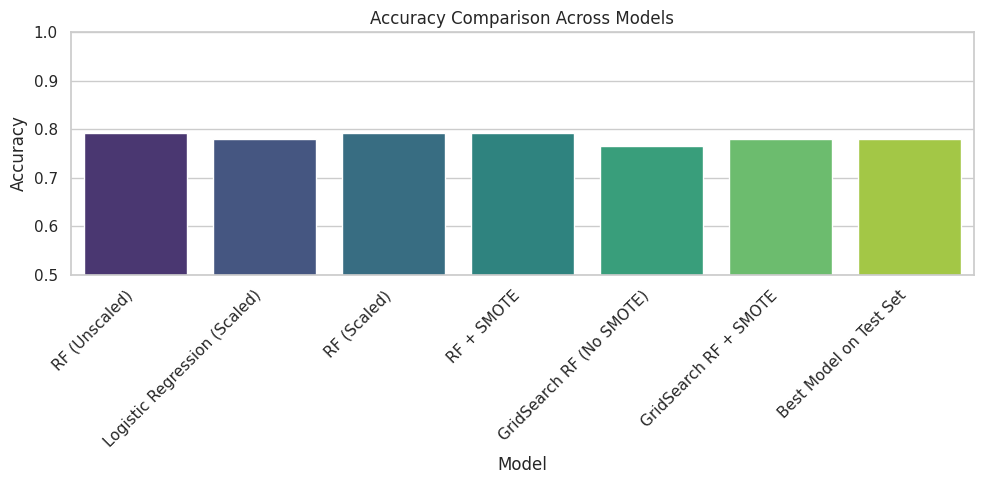

/tmp/ipython-input-44-2928364929.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


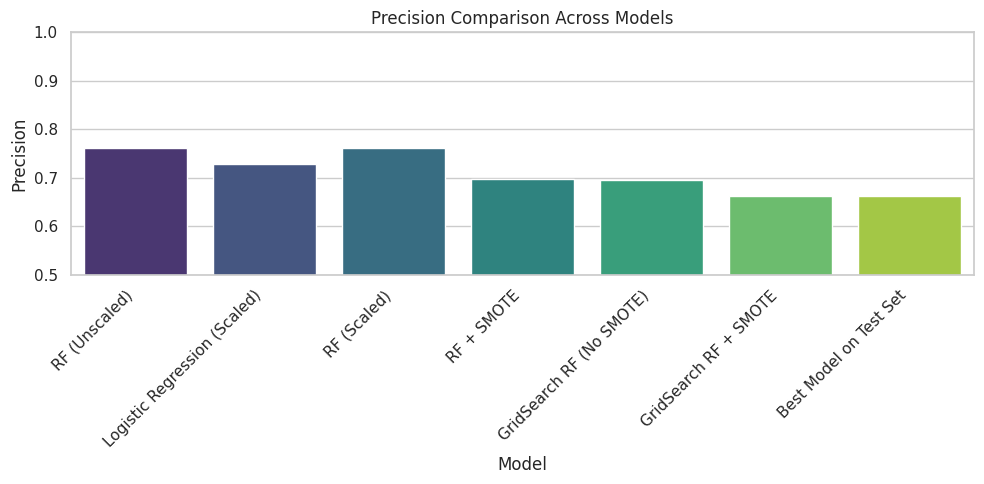

/tmp/ipython-input-44-2928364929.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


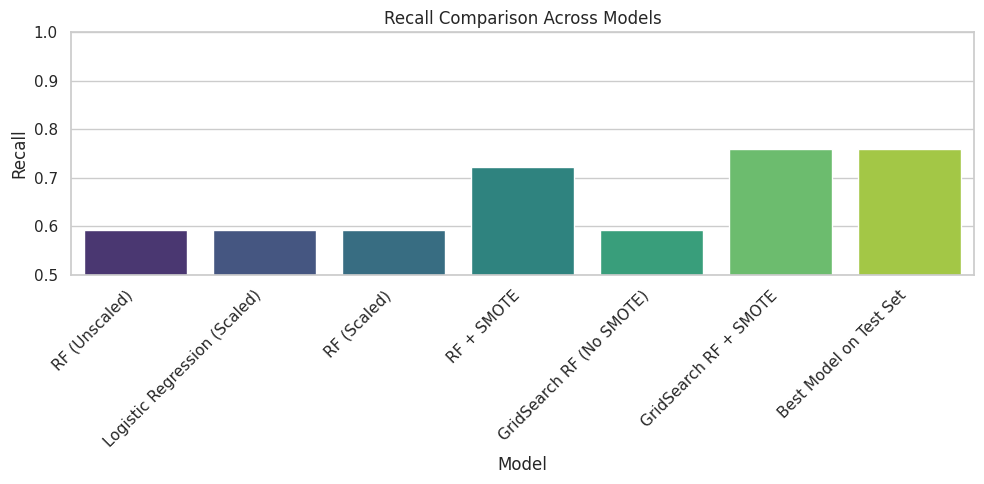

/tmp/ipython-input-44-2928364929.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


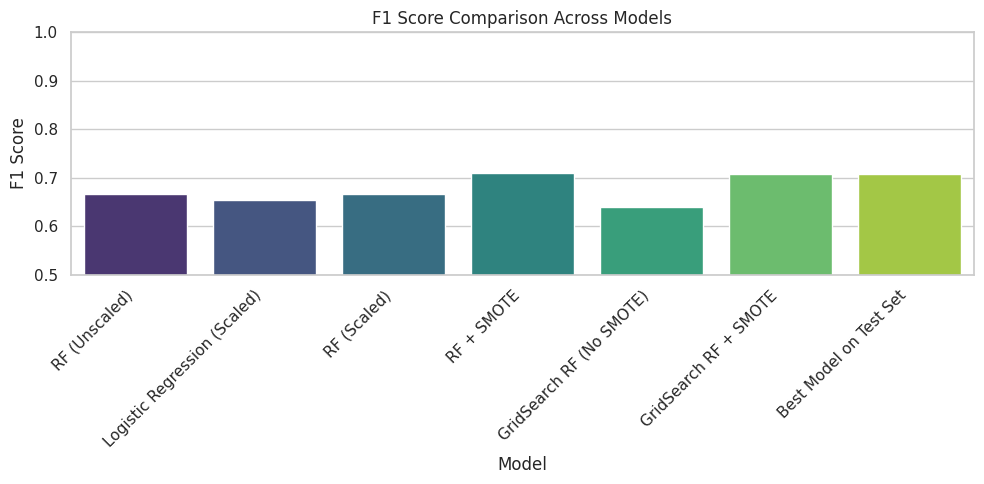

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: define variables from each model's output
rf_unscaled_metrics =     {'acc': rf_unscaled_acc, 'prec': rf_unscaled_prec, 'rec': rf_unscaled_rec, 'f1': rf_unscaled_f1}
logreg_scaled_metrics =   {'acc': logreg_acc, 'prec': logreg_prec, 'rec': logreg_rec, 'f1': logreg_f1}
rf_scaled_metrics =       {'acc': rf_scaled_acc, 'prec': rf_scaled_prec, 'rec': rf_scaled_rec, 'f1': rf_scaled_f1}
rf_smote_metrics =        {'acc': rf_smote_acc, 'prec': rf_smote_prec, 'rec': rf_smote_rec, 'f1': rf_smote_f1}
grid_nosmote_metrics =    {'acc': grid_nosmote_acc, 'prec': grid_nosmote_prec, 'rec': grid_nosmote_rec, 'f1': grid_nosmote_f1}
grid_smote_metrics =      {'acc': grid_smote_acc, 'prec': grid_smote_prec, 'rec': grid_smote_rec, 'f1': grid_smote_f1}
test_metrics =            {'acc': test_acc, 'prec': test_prec, 'rec': test_rec, 'f1': test_f1}

# Create list of models and their metric dictionaries
model_results = [
    ("RF (Unscaled)", rf_unscaled_metrics),
    ("Logistic Regression (Scaled)", logreg_scaled_metrics),
    ("RF (Scaled)", rf_scaled_metrics),
    ("RF + SMOTE", rf_smote_metrics),
    ("GridSearch RF (No SMOTE)", grid_nosmote_metrics),
    ("GridSearch RF + SMOTE", grid_smote_metrics),
    ("Best Model on Test Set", test_metrics),
]

# Convert to DataFrame
results_df = pd.DataFrame([{
    "Model": name,
    "Accuracy": metrics['acc'],
    "Precision": metrics['prec'],
    "Recall": metrics['rec'],
    "F1 Score": metrics['f1']
} for name, metrics in model_results])

# Plot
sns.set(style="whitegrid")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'{metric} Comparison Across Models')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.5, 1.0)
    plt.tight_layout()
    plt.show()
